<a href="https://colab.research.google.com/github/abhilb/Open-eye-closed-eye-classification/blob/main/part2/MRL_Eye_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
tf.__version__

'2.7.0'

In [2]:
!gdown https://drive.google.com/uc?id=1w0e2KZbca2emoJ_VV7zdUEkHN1JHjkAW

Downloading...
From: https://drive.google.com/uc?id=1w0e2KZbca2emoJ_VV7zdUEkHN1JHjkAW
To: /content/mrl_dataset_64.npz
100% 2.78G/2.78G [00:22<00:00, 125MB/s]


In [3]:
dataset_path = Path('mrl_dataset_64.npz').absolute().resolve()
data = np.load(str(dataset_path))
X = data['data']
y = data['labels']
data.close()

In [4]:
x_train, x_test, _, _ = train_test_split(X, y, test_size=0.33, random_state=42)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (x_train.shape[0], 64, 64, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 64, 64, 1))
print(x_train.shape)
print(x_test.shape)

(56881, 64, 64, 1)
(28017, 64, 64, 1)


In [5]:
class Autoencoder(Model):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      Input(shape=(64, 64, 1)),
      Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder()

In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[EarlyStopping(monitor='loss', patience=3)])
autoencoder.encoder.summary()

Epoch 1/10
1778/1778 [==============================] - 37s 15ms/step - loss: 0.0269 - val_loss: 0.0104
Epoch 2/10
1778/1778 [==============================] - 25s 14ms/step - loss: 0.0103 - val_loss: 0.0103
Epoch 3/10
1778/1778 [==============================] - 25s 14ms/step - loss: 0.0103 - val_loss: 0.0103
Epoch 4/10
1778/1778 [==============================] - 25s 14ms/step - loss: 0.0102 - val_loss: 0.0103
Epoch 5/10
1778/1778 [==============================] - 24s 14ms/step - loss: 0.0102 - val_loss: 0.0103
Epoch 6/10
1778/1778 [==============================] - 24s 14ms/step - loss: 0.0102 - val_loss: 0.0103
Epoch 7/10
1778/1778 [==============================] - 25s 14ms/step - loss: 0.0102 - val_loss: 0.0103
Epoch 8/10
1778/1778 [==============================] - 24s 14ms/step - loss: 0.0102 - val_loss: 0.0102
Epoch 9/10
1778/1778 [==============================] - 24s 14ms/step - loss: 0.0102 - val_loss: 0.0102
Epoch 10/10
1778/1778 [==============================] - 24s 14m

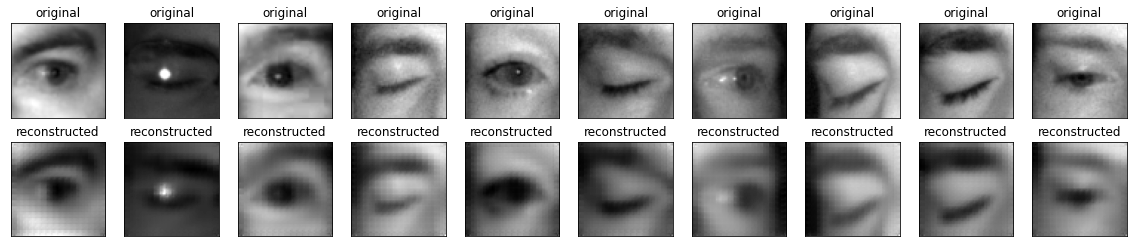

In [7]:
decoded_imgs = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()